In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
from shapely.geometry import Point
from shapely.geometry import Polygon, MultiPolygon
from pysal.viz import mapclassify
import seaborn as sns
import contextily as cx


/home/janos/Documents/ITU/II_semester/venv/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_6468/1660620752.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/l

In [2]:
coordinates = pd.read_csv('../data/coordinates.csv')
geometry = [Point(xy) for xy in zip(coordinates.lon, coordinates.lat)]
gdf_coordinates = gpd.GeoDataFrame(coordinates, geometry=geometry, crs='EPSG:4326')

In [3]:
gdf_coordinates.head()

,lon,lat,geometry
0,10.773977,59.914943,POINT (10.77398 59.91494)
1,10.773805,59.946710,POINT (10.77381 59.94671)
2,10.757724,59.953411,POINT (10.75772 59.95341)
3,10.753764,59.905124,POINT (10.75376 59.90512)
4,10.703900,59.918578,POINT (10.70390 59.91858)


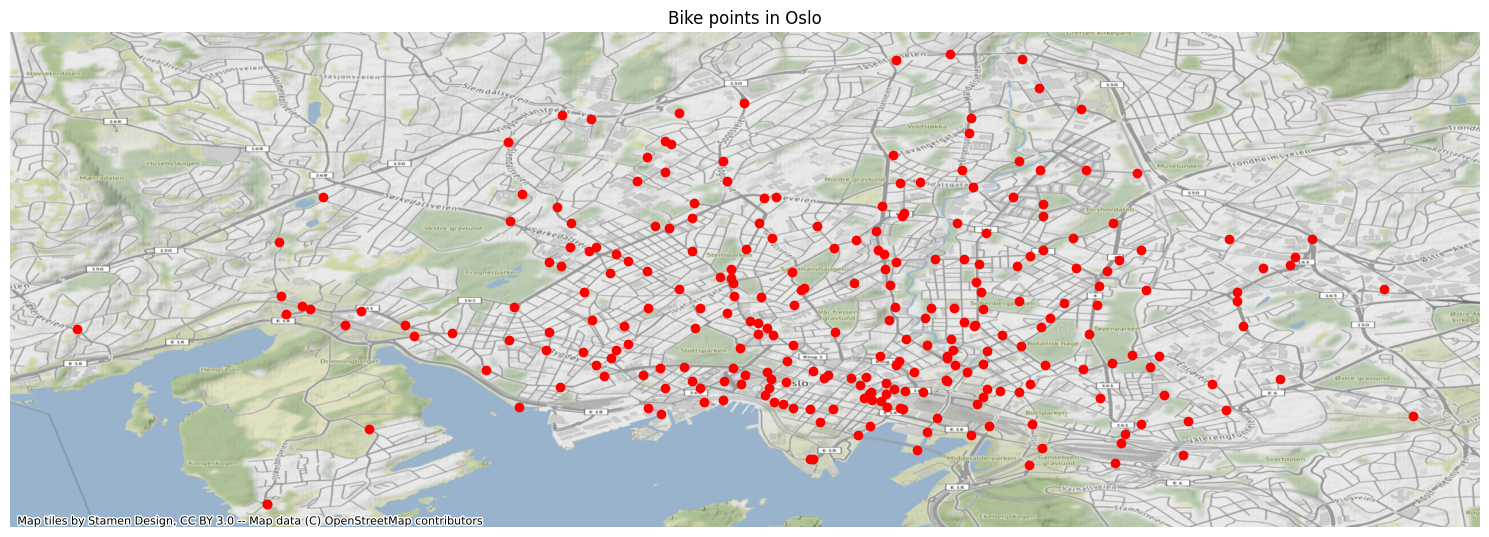

In [4]:
import contextily as cx

fig, ax = plt.subplots(figsize=(15,15))
gdf_coordinates.plot(ax=ax, color='red')
ax.set_axis_off()
ax.set_title('Bike points in Oslo')
cx.add_basemap(ax=ax, source=cx.providers.Stamen.Terrain, crs=gdf_coordinates.crs)
plt.tight_layout()

In [5]:
disticts = gpd.read_file('../data/districts.shp')
disticts

,name,count,geometry
0,Frogner,49,"POLYGON ((261347.747 6651007.379, 261358.792 6..."
1,Bjerke,1,"POLYGON ((265706.572 6653029.711, 265707.249 6..."
2,Nordre Aker,14,"POLYGON ((260594.240 6651973.845, 260596.572 6..."
3,Vestre Aker,6,"POLYGON ((255537.191 6656021.357, 255641.689 6..."
4,Gamle Oslo,30,"POLYGON ((262568.341 6648392.784, 262592.012 6..."
5,Sagene,21,"POLYGON ((262524.600 6651039.594, 262521.279 6..."
6,Ullern,9,"POLYGON ((258293.571 6650203.687, 257728.667 6..."
7,Grünerløkka,50,"POLYGON ((262618.770 6649504.877, 262654.140 6..."
8,Sentrum,42,"POLYGON ((261664.750 6650191.125, 261671.149 6..."
9,St. Hanshaugen,40,"POLYGON ((261664.750 6650191.125, 261650.548 6..."


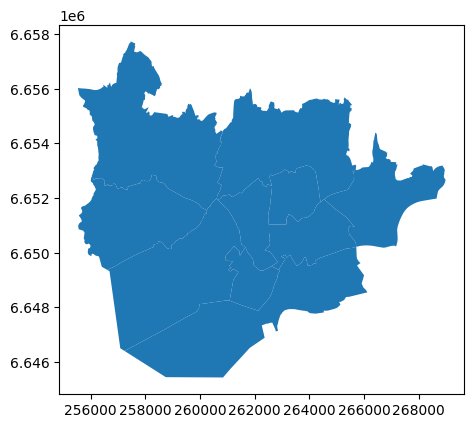

In [6]:
disticts.crs = 'EPSG:25832'
disticts.plot()
plt.show()

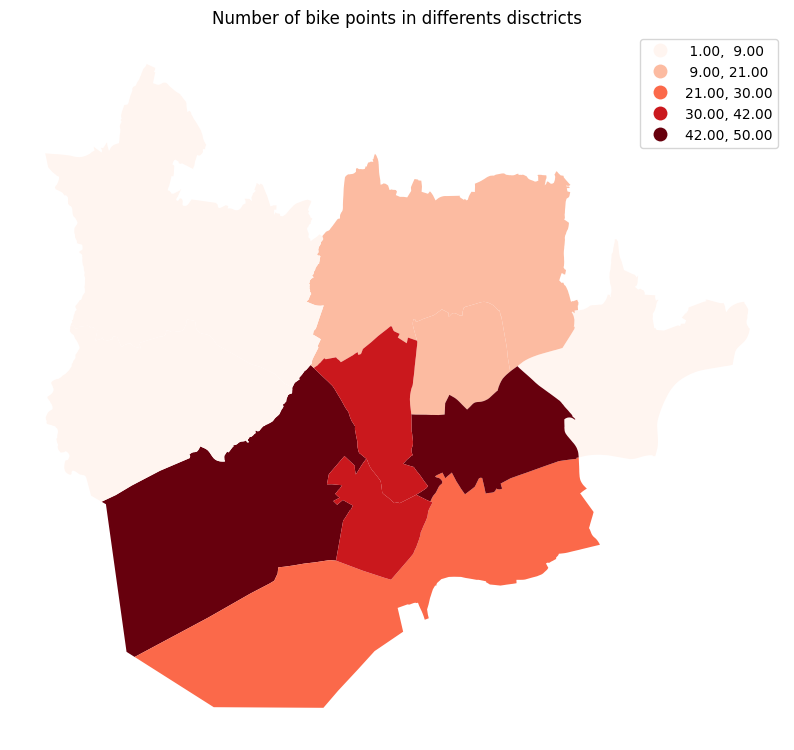

In [7]:
fig, ax = plt.subplots(1, figsize=(10,10))

disticts.plot(ax=ax,
    column="count", 
    scheme="fisher_jenks", 
    k=5,
    cmap="Reds",
    legend=True
)

ax.set_axis_off()

ax.set_title('Number of bike points in differents disctricts')

plt.show()

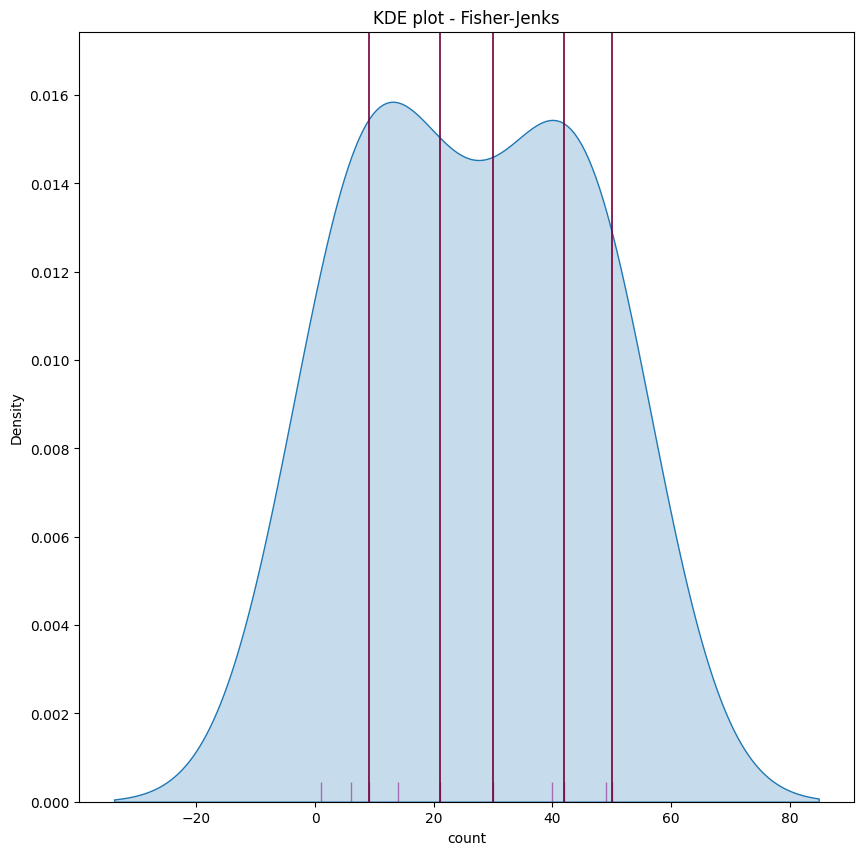

In [8]:
fj_classes = mapclassify.FisherJenks(disticts["count"], k=5)

fig, ax = plt.subplots(1, figsize=(10,10))

sns.kdeplot(disticts["count"], fill=True)
sns.rugplot(disticts["count"], alpha=0.5, color='purple')

for bp in fj_classes.bins:
    plt.axvline(bp, color='xkcd:merlot', linewidth=1.2)

ax.set_title('KDE plot - Fisher-Jenks')

plt.show()